In [1]:
import config
import numpy as np
import pandas as pd

baseline1_csv_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce/github/Results/Baseline_results_train_with_1data.csv'
baseline2_csv_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce/github/Results/Baseline_results_train_with_10data.csv'
baseline3_csv_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce/github/Results/Baseline_results_train_with_14data.csv'
baseline4_csv_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce/github/Results/Baseline_results_train_with_18data.csv'
baseline5_csv_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce/github/Results/Baseline_results_train_with_22data.csv'

baseline_K = ['1', '10', '14', '18', '22']
baselines = [baseline1_csv_path, baseline2_csv_path,  baseline3_csv_path,  baseline4_csv_path, baseline5_csv_path]

# Baseline: Training datasets and store
- Time 1 (1 day)
- Time 10 (3 days)
- Time 14 (4 days)
- Time 18 (5 days)
- Time 22 (6 days)

In [1]:
'''import Test_without_Training

if __name__ == "__main__":
    for K in [1, 10, 14, 18, 22]:
        trainer = Test_without_Training.TremorModelTrainer(config, subject="Hunmin")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../Results/Baseline_results_train_with_{K}data.csv')'''
# 저장해놨어서 굳이 안돌려도 됨

Dataset 1/30 - Session Exp_2025-05-27/E8331D05289A/
(8539, 4, 14, 1) (8539,)
Dataset 2/30 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 89.45%
Maximum validation accuracy : 94.19%
Accuracy of test dataset using model V0: 94.1860%
Dataset 3/30 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 77.2007%
Dataset 4/30 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 84.4073%
Dataset 5/30 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Accuracy on unseen dataset: 84.1160%
Dataset 6/30 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Accuracy on unseen dataset: 67.4082%
Dataset 7/30 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Accuracy on unseen dataset: 74.8428%
Dataset 8/30 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Accuracy on unseen dataset: 76.4447%
Dataset 9/30 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Accuracy on unseen dataset: 73.2799%
Dataset 10/30 - Session Exp_2025-0

# Training from scratch in every data
- Performance should be high
- Objective

In [ ]:
import Training_from_scratch

prog_trainer = Training_from_scratch.ProgressiveTrainer(config, subject="Hunmin")
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
prog_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")


Dataset 1/30 - Session Exp_2025-05-27/E8331D05289A/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 83.56%
Maximum validation accuracy : 92.63%

Dataset 2/30 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Start Training (total epochs: 50)...


# Transfer Learning - Incremental : Model is cumulatively updated

In [ ]:
import Transfer_Learning

tl_trainer = Transfer_Learning.TransferLearningTrainer(config, subject="Hunmin", increment_true_false="True")
Init_acc_all, Prev_acc_all, Trained_acc_all = tl_trainer.run(plot_learning_curve=False)   #True if want to see convergence for each session round
tl_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training this data (init; unseen) - incrementally trained model with previous datasets: {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training (with increment): {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training (with increment): {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")

# Few-shot Learning (MAML) adaptation

Dataset 1/30 - Session Exp_2025-05-27/E8331D05289A/
Epoch 1: Loss=1.0842, Acc=0.7000
Epoch 11: Loss=0.8255, Acc=0.7300
Epoch 21: Loss=0.8987, Acc=0.7800
Epoch 31: Loss=1.0027, Acc=0.8100
Epoch 41: Loss=1.0645, Acc=0.8000
Dataset 2/30 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Dataset 3/30 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Dataset 4/30 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Dataset 5/30 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Dataset 6/30 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Dataset 7/30 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Dataset 8/30 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Dataset 9/30 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Dataset 10/30 - Session Exp_2025-06-20-v8/E9AD0E7DCC2B/
Dataset 11/30 - Session Exp_2025-06-23-v1/E9AD0E7DCC2B/
Dataset 12/30 - Session Exp_2025-06-23-v2/E9AD0E7DCC2B/
Dataset 13/30 - Session Exp_2025-06-23-v3/E9AD0E7DCC2B/
Dataset 14/30 - Session Exp_2025-06-23-v4/E9AD0E7DCC2B/
Dataset 15/30 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Datase

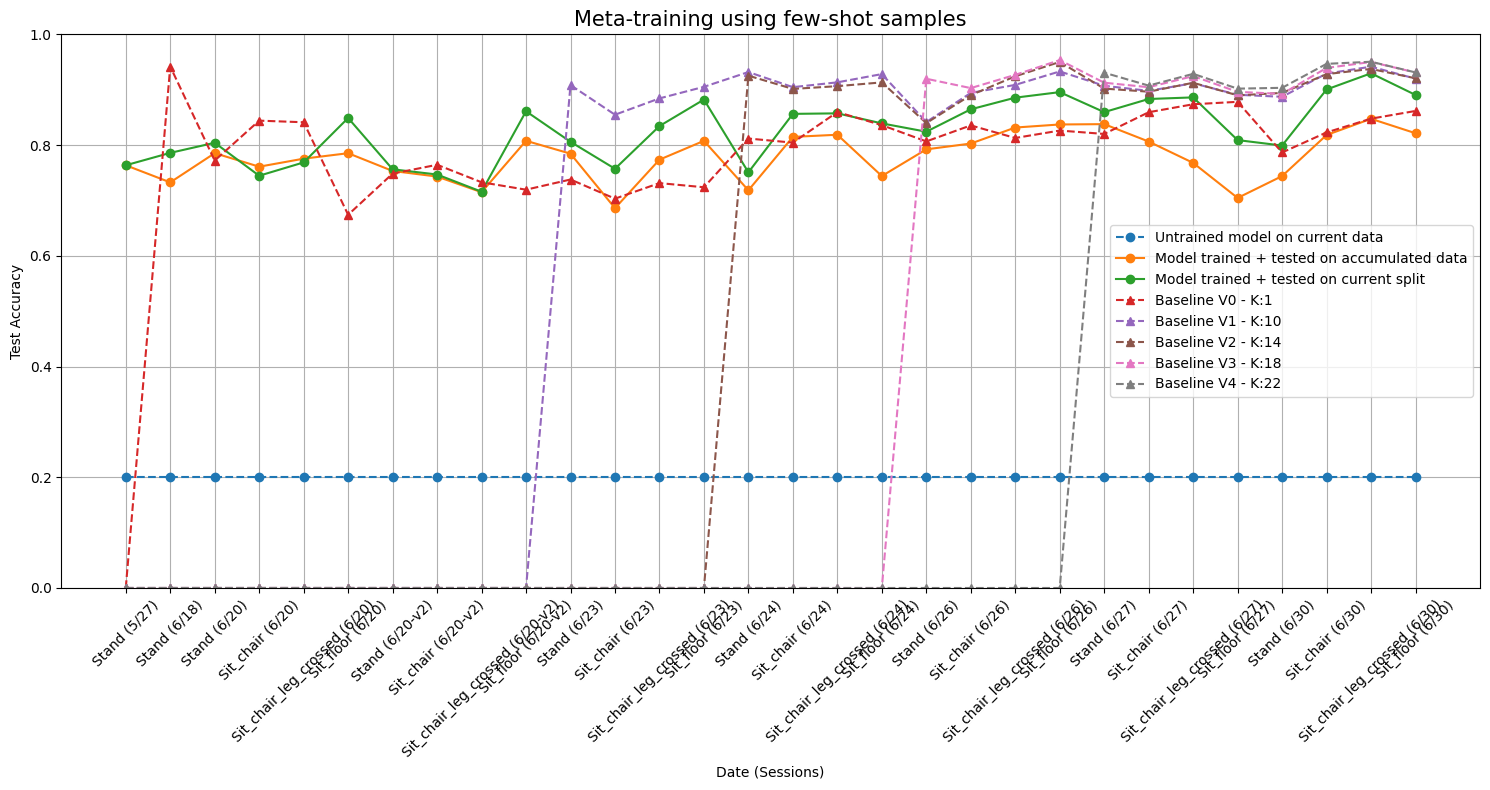

Average of acc without training anything (should be random): 20.00%
Average of acc using previous test data after training: 77.94%
Average of acc using current test data after training: 82.69%
Baseline K-1: 80.27%
Baseline K-10: 90.47%
Baseline K-14: 90.82%
Baseline K-18: 92.11%
Baseline K-22: 92.51%


In [3]:
import Few_shot_Learning

trainer = Few_shot_Learning.MAMLProgressiveTrainer(config, subject="Hunmin", K_shot=10, query_size=100)
Init_acc_all, Prev_acc_all, Trained_acc_all = trainer.run()
trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")

# Continual Learning (EWC)

Dataset 1/30 - Session Exp_2025-05-27/E8331D05289A/
Start Training (total epochs: 20)...
Finish Training! (Model is saved)
Maximum training accuracy : 87.01%
Maximum validation accuracy : 91.86%
Dataset 2/30 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Dataset 3/30 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Dataset 4/30 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Dataset 5/30 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Dataset 6/30 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Dataset 7/30 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Dataset 8/30 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Dataset 9/30 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Dataset 10/30 - Session Exp_2025-06-20-v8/E9AD0E7DCC2B/
Dataset 11/30 - Session Exp_2025-06-23-v1/E9AD0E7DCC2B/
Dataset 12/30 - Session Exp_2025-06-23-v2/E9AD0E7DCC2B/
Dataset 13/30 - Session Exp_2025-06-23-v3/E9AD0E7DCC2B/
Dataset 14/30 - Session Exp_2025-06-23-v4/E9AD0E7DCC2B/
Dataset 15/30 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Dataset 16/30 - Session Exp_2025

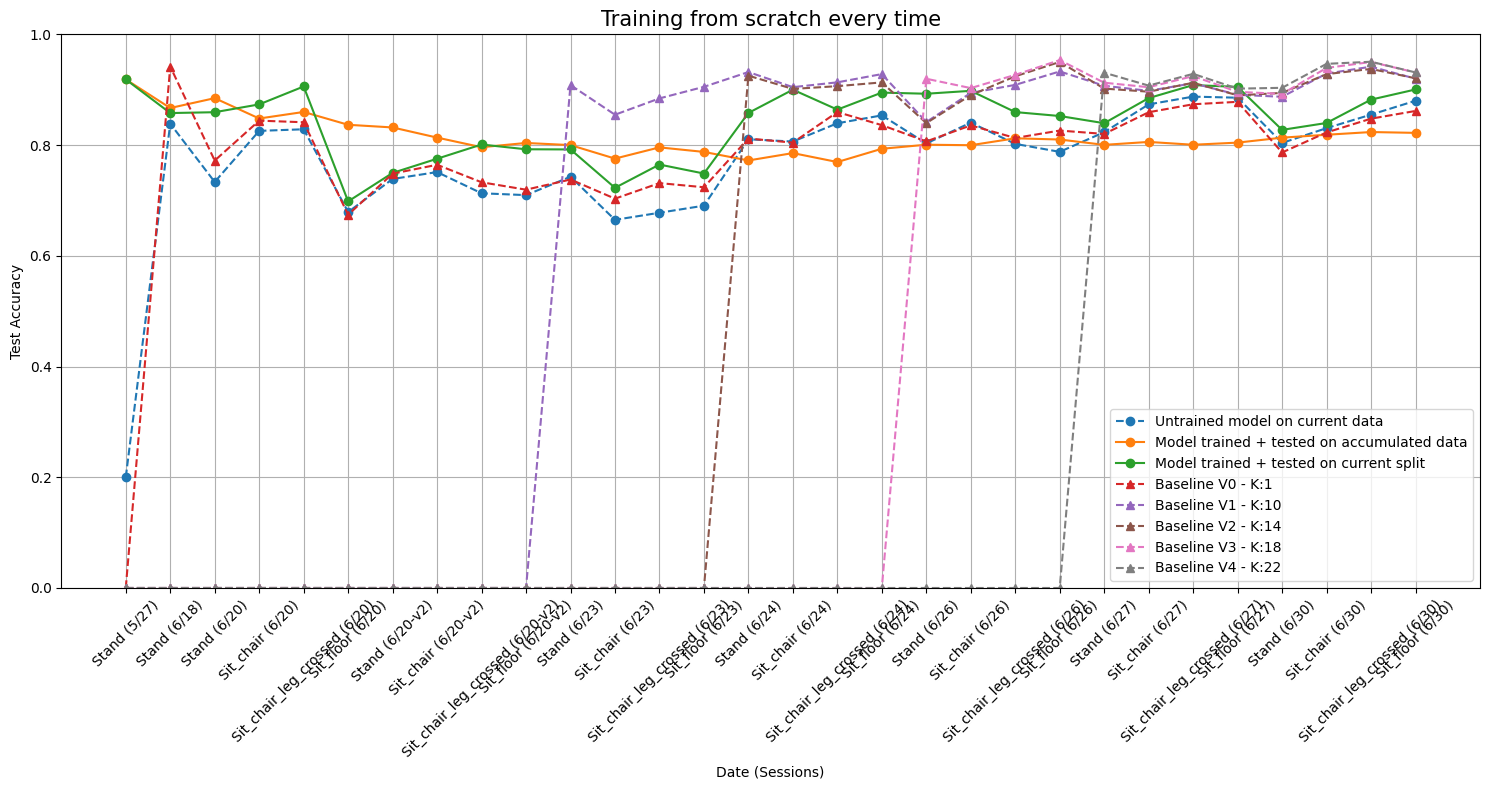

Average of acc without training this data (init; unseen): 77.25%
Average of acc using previous test data after training: 84.22%
Average of acc using current test data after training: 81.50%


In [2]:
import Continual_Learning_EWC_

cl_trainer = Continual_Learning_EWC_.ContinualLearningTrainer(config, subject="Hunmin")
Init_acc_all, Prev_acc_all, Trained_acc_all = cl_trainer.run()
cl_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training this data (init; unseen): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][1:])):.2f}%")